# **Project Name**
$\color{red}{\text{DPDzero Data Assignment}}$

# **Project Summary**

**Data Processing**

    1.Importing libraries
    2.Function for reading dataset
    3.dataset information 
    4.Missing values,Duplicated values

**Exploratory Data Analysis**

**Supervised Machine learning Algorithm**

```
# This is formatted as code
```

# **Problem Statement**

# **Data overview and column description**

**There are two dataset needed for the project**

## **portfolio data** 
**This contains the details on loans given to few customers and their demographic information**

| Column          | Description     |
| --------------- | --------------- |
| Loan Number     | Loan Number given to each customer  |
| Due Date        |  Repaying dae of loan by the customer |
| State           |  origin of state of each customer |
| DOB             |Date of birth of the customer   |
| Loan Amount     | Loan amount given to each customer |


## **Communication History**
**The attempts made to reach out to these customers and the status of these calls.**

| Column          | Description     |
| --------------- | --------------- |
| Loan Number     | Loan Number given to each customer  |
| Campaign ID     |  Campaign ID by the bank  |
|Communication Operator Message ID  |  operator Id for each communication done in messages |
| Call time       |Date of birth of the customer   |
| Status    | status of the repayment |

# **Let's Begin**

## **Knowing the Data**

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime


### Dataset Loading

In [2]:
# Function to load the data 
def DataLoader(path,Date=None,date_cols=None):
    """
    A function to load the datset 
    Argumet - Path(path to the data file)
    return - dataframe
    """
    try:
        dataframe = pd.read_excel(path,index_col=Date,parse_dates=date_cols)
        return dataframe
    except: # if path is incorrect or does not exist
        print("path does not find")

    finally:
        print("operation performed on the  dataset Location")

In [3]:
CommunicationHistory_df = DataLoader("CommunicationHistory.xlsx",date_cols=['Call time'])

operation performed on the  dataset Location


In [4]:
date_cols = ['Due Date','DOB']
portfolio_df = DataLoader("Portfolio_data.xlsx",date_cols=date_cols)

operation performed on the  dataset Location


### Dataset First View

In [5]:
CommunicationHistory_df.head()

,Loan Number,Campaign ID,Communication Operator Message ID,Call time,Status
0,16748071234,161584404,21a1f7b1ce4d23d558e300626d5016c2,2022-12-02 02:59:40.973000+00:00,completed
1,16734601234,161584404,edecb5cd796826ef8bcde2f4814f16c2,2022-12-02 03:57:51.335000+00:00,completed
2,1631580,161307935,6a79ed24fa727ae9341f53a9df8816c2,2022-12-02 04:34:26.950000+00:00,completed
3,1631580,161307935,ce45ac657c26d5d10e6d1eb4aacc16c2,2022-12-02 04:34:57.213000+00:00,completed
4,1631580,161307935,6c864d7097f2df3eed4900ea892816c2,2022-12-02 04:36:21.594000+00:00,completed


In [6]:
portfolio_df.head()

,Loan Number,Due Date,State,DOB,Loan Amount
0,1003431,2022-10-31,KARNATAKA,1987-02-09 00:00:00,240000.0
1,1004356,2022-10-31,MAHARASHTRA,1994-05-23 00:00:00,56000.0
2,1004464,2022-11-01,UTTAR PRADESH,1996-12-01 00:00:00,50000.0
3,1004626,2022-11-01,KERALA,1995-07-14 00:00:00,63000.0
4,1005011,2022-11-01,MAHARASHTRA,1994-05-30 00:00:00,50000.0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f"the CommunicationHistory dataset has toltal of  {CommunicationHistory_df.shape[0]} rows and {CommunicationHistory_df.shape[1]} columns")

the CommunicationHistory dataset has toltal of  70607 rows and 5 columns


In [8]:
# Dataset Rows & Columns count
print(f"the portfolio dataset has toltal of  {portfolio_df.shape[0]} rows and {portfolio_df.shape[1]} columns")

the portfolio dataset has toltal of  15962 rows and 5 columns


### Dataset Information

In [9]:
# Dataset Info
CommunicationHistory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70607 entries, 0 to 70606
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   Loan Number                        70607 non-null  int64              
 1   Campaign ID                        70607 non-null  int64              
 2   Communication Operator Message ID  70597 non-null  object             
 3   Call time                          70607 non-null  datetime64[ns, UTC]
 4   Status                             70607 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 2.7+ MB


In [10]:
# portfolio Dataset Info
portfolio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15962 entries, 0 to 15961
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Loan Number  15962 non-null  int64         
 1   Due Date     15962 non-null  datetime64[ns]
 2   State        15962 non-null  object        
 3   DOB          15961 non-null  object        
 4   Loan Amount  15962 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 623.6+ KB


#### Duplicate Values

In [11]:
# CommunicationHistory Dataset Duplicate Value Count
CommunicationHistory_df.duplicated().sum()

0

In [12]:
# portfolio Dataset Duplicate Value Count
portfolio_df.duplicated().sum()

0

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count in CommunicationHistory dataset
CommunicationHistory_df.isna().sum().sort_values(ascending=False)

Communication Operator Message ID    10
Loan Number                           0
Campaign ID                           0
Call time                             0
Status                                0
dtype: int64

In [14]:
# Missing Values/Null Values Count in portfolio dataset
portfolio_df.isna().sum().sort_values(ascending=False)

DOB            1
Loan Number    0
Due Date       0
State          0
Loan Amount    0
dtype: int64

### Dataset Description

In [15]:
CommunicationHistory_df.describe(include='all')

,Loan Number,Campaign ID,Communication Operator Message ID,Call time,Status
count,7.060700e+04,7.060700e+04,70597,70607,70607
unique,NaN,NaN,70597,70563,2
top,NaN,NaN,21a1f7b1ce4d23d558e300626d5016c2,2022-12-03 13:16:19.023000+00:00,completed
freq,NaN,NaN,1,2,70589
first,NaN,NaN,NaN,2022-12-02 02:59:40.973000+00:00,NaN
last,NaN,NaN,NaN,2022-12-07 23:25:16.448000+00:00,NaN
mean,2.387413e+06,1.681513e+08,NaN,NaN,NaN
std,1.077388e+08,2.845385e+06,NaN,NaN,NaN
min,8.727770e+05,1.354742e+08,NaN,NaN,NaN
25%,1.635118e+06,1.654490e+08,NaN,NaN,NaN


In [16]:
portfolio_df.describe(include='all')

,Loan Number,Due Date,State,DOB,Loan Amount
count,1.596200e+04,15962,15962,15961,15962.000000
unique,NaN,30,40,6741,NaN
top,NaN,2022-11-25 00:00:00,MAHARASHTRA,1998-01-01 00:00:00,NaN
freq,NaN,1080,2538,56,NaN
first,NaN,2022-10-31 00:00:00,NaN,NaN,NaN
last,NaN,2022-11-29 00:00:00,NaN,NaN,NaN
mean,1.689427e+06,NaN,NaN,NaN,7362.359952
std,1.211048e+05,NaN,NaN,NaN,6398.129954
min,8.727770e+05,NaN,NaN,NaN,3000.000000
25%,1.640865e+06,NaN,NaN,NaN,5000.000000


In [17]:
#print unique value in categorical value 
#since the dataset is large numerical value whose unique number are less than should be focussed

def print_values(dataframe):
    for i in dataframe.columns.tolist():
        if dataframe[i].dtype=='O':
            print(f"the categorical column {i} have {dataframe[i].nunique()} unique values ")
            if dataframe[i].nunique() <=31 :
                print(f"the unique value in the columns are {dataframe[i].unique()}")
        else:
            print(f"the  numerical column {i} have {dataframe[i].nunique()} unique values ")
            if dataframe[i].nunique() <=15:
                print(f" the unique value in the columns are{dataframe[i].unique()}")

In [18]:
print_values(CommunicationHistory_df)

the  numerical column Loan Number have 11220 unique values 
the  numerical column Campaign ID have 40 unique values 
the categorical column Communication Operator Message ID have 70597 unique values 
the  numerical column Call time have 70563 unique values 
the categorical column Status have 2 unique values 
the unique value in the columns are ['completed' 'FAILED']


In [19]:
print_values(portfolio_df)

the  numerical column Loan Number have 15962 unique values 
the  numerical column Due Date have 30 unique values 
the categorical column State have 40 unique values 
the categorical column DOB have 6741 unique values 
the  numerical column Loan Amount have 304 unique values 


## Data Wrangling 

**To perform opearationon dataset we have to merge the dataset,Since both the dataset have Loan number in common we would merge the dataset on Loan number**

In [20]:
#create final dataset by merging the two dataframe on  Loan Number column 
final_dataset = pd.merge(CommunicationHistory_df,portfolio_df,how='left', on='Loan Number')

In [21]:
final_dataset.head()

,Loan Number,Campaign ID,Communication Operator Message ID,Call time,Status,Due Date,State,DOB,Loan Amount
0,16748071234,161584404,21a1f7b1ce4d23d558e300626d5016c2,2022-12-02 02:59:40.973000+00:00,completed,NaT,NaN,NaN,NaN
1,16734601234,161584404,edecb5cd796826ef8bcde2f4814f16c2,2022-12-02 03:57:51.335000+00:00,completed,NaT,NaN,NaN,NaN
2,1631580,161307935,6a79ed24fa727ae9341f53a9df8816c2,2022-12-02 04:34:26.950000+00:00,completed,NaT,NaN,NaN,NaN
3,1631580,161307935,ce45ac657c26d5d10e6d1eb4aacc16c2,2022-12-02 04:34:57.213000+00:00,completed,NaT,NaN,NaN,NaN
4,1631580,161307935,6c864d7097f2df3eed4900ea892816c2,2022-12-02 04:36:21.594000+00:00,completed,NaT,NaN,NaN,NaN


#### Distribution of loans across different states

In [22]:
#groupt the datasetby state and calculate avg loan amount across states
final_dataset.groupby("State")["Loan Amount"].mean().reset_index().sort_values("Loan Amount",ascending= False)

,State,Loan Amount
14,HIMACHAL PRADESH,13317.750000
3,Arunachal Pradesh,12769.230769
23,Maharashtra,12190.476190
32,Sikkim,11807.827586
12,Goa,9924.816667
5,CHATTISGARH,9267.178125
19,KERALA,8270.710578
18,KARNATAKA,8146.555493
33,TAMIL NADU,7955.937760
38,WEST BENGAL,7743.899696


In [23]:
#groupt the datasetby state and calculate avg loan amount across states
final_dataset.groupby("State")["Loan Amount"].count().reset_index().sort_values("Loan Amount",ascending= False)

,State,Loan Amount
21,MAHARASHTRA,10264
18,KARNATAKA,8848
33,TAMIL NADU,7198
34,TELANGANA,6030
1,ANDHRA PRADESH,5459
36,UTTAR PRADESH,5310
11,GUJARAT,4258
31,RAJASTHAN,3309
20,MADHYA PRADESH,2800
10,DELHI,2794


**Himachal pradesh have the highest Loan amount average and Andaman &Nicobar islands have the lowest Loan amount sanctioned across the city**

#### Distribution of loans across different amounts

In [24]:
# Divide the data into categories
bins =  [1000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 15000]
# Use the `cut` function to assign each data point to a category
categories = pd.cut(final_dataset["Loan Amount"], bins, labels=["1000-5000", "5000-6000","6000-7000","7000-8000","8000-9000","9000-10000", "10000-11000","11000-15000"])

# Count the number of data points in each category
counts = categories.value_counts().reset_index().rename(columns={'Loan Amount': 'Count'})

In [25]:
counts

,index,Count
0,1000-5000,32231
1,6000-7000,14882
2,5000-6000,10170
3,9000-10000,3198
4,11000-15000,2394
5,7000-8000,1656
6,10000-11000,791
7,8000-9000,303


#### Distribution of customers by age

In [26]:
#select only those rows where the DOB is not null
dob_dataframe = final_dataset[final_dataset["DOB"].notnull()]

In [27]:
# convert to time stamp 
dob_dataframe["DOB"]= pd.to_datetime(dob_dataframe["DOB"],format='%Y-%m-%d %H:%M:%S')

In [28]:
today = datetime.now()#present day
dob_dataframe["Age"] = (today-dob_dataframe["DOB"]).astype('<m8[Y]')

In [29]:
dob_dataframe.groupby("Age")["Loan Amount"].mean().reset_index().sort_values("Age",ascending= True)

,Age,Loan Amount
0,18.0,6651.107843
1,19.0,5621.002677
2,20.0,5962.259259
3,21.0,6072.889217
4,22.0,6608.532473
5,23.0,6784.197985
6,24.0,7033.344296
7,25.0,7660.529435
8,26.0,8074.357057
9,27.0,7074.307930


**Divide the age into four categories and see the loan amount distribution in thes categories**

In [30]:
# define the age_category function
def age_category(dataframe):
    if dataframe["Age"] >= 18 and dataframe["Age"] <=24 :
        dataframe["people Age section"] = "people Early 20s"
    elif dataframe["Age"] >=25 and dataframe["Age"] <=30 :
        dataframe["people Age section"] = "people in Mid 20s"
    elif dataframe["Age"] >=31 and dataframe["Age"] <=40 :
        dataframe["people Age section"] = "people in 30s"
    elif dataframe["Age"] >=41 and dataframe["Age"] <=50 :
        dataframe["people Age section"] = "people in 40s"
    elif dataframe["Age"] >=51 and dataframe["Age"] <=60 :
        dataframe["people Age section"] = "people in 50s"
    elif dataframe["Age"] >=61 and dataframe["Age"] <=70 :
        dataframe["people Age section"] = "people in 60s"
    elif dataframe["Age"] >=71 and dataframe["Age"] <=80 :
        dataframe["people Age section"] = "people in 70s"
    return dataframe

In [31]:
age_dataset = dob_dataframe.apply(age_category, axis=1)

In [32]:
age_dataset.groupby("people Age section")["Loan Amount"].mean().reset_index().sort_values("Loan Amount",ascending= True)

,people Age section,Loan Amount
4,people in 60s,5021.213333
5,people in 70s,5043.105263
0,people Early 20s,6597.941050
3,people in 50s,6724.163912
6,people in Mid 20s,7745.991447
2,people in 40s,7841.033528
1,people in 30s,8052.390373


In [33]:
age_dataset.groupby("people Age section")["Loan Amount"].count().reset_index().sort_values("Loan Amount",ascending= True)

,people Age section,Loan Amount
5,people in 70s,19
4,people in 60s,75
3,people in 50s,726
2,people in 40s,4271
1,people in 30s,18303
0,people Early 20s,20424
6,people in Mid 20s,26773


**People in their 3o have the highest loan amount Distribution followed by people in 40s However people in their 60s have lowest Loan amount distribution followed by people in 70s and people in early 20s**

#### Distribution of loans by due dates

In [34]:
age_dataset.groupby("Due Date")["Loan Amount"].mean().reset_index().sort_values("Loan Amount",ascending= True)

,Due Date,Loan Amount
14,2022-11-14,6115.435286
21,2022-11-21,6472.757015
15,2022-11-15,6490.685978
19,2022-11-19,6753.528858
20,2022-11-20,6765.244860
25,2022-11-25,6782.857967
12,2022-11-12,6905.481984
13,2022-11-13,6965.586239
5,2022-11-05,7330.517038
2,2022-11-02,7367.940163


In [35]:
# create a new column containing the day component of the datetime column
age_dataset['Due_date_day'] = age_dataset['Due Date'].dt.day

In [36]:
def week_of_month(dataframe):
    if dataframe['Due_date_day'] >=1 and dataframe['Due_date_day'] <=7 :
        dataframe['week']= "1st week of month"
    elif dataframe['Due_date_day'] >=8 and dataframe['Due_date_day'] <=14 :
        dataframe['week']= "2nd week of month"
    elif dataframe['Due_date_day'] >=15 and dataframe['Due_date_day'] <=22 :
        dataframe['week']= "3rd week of month"
    elif dataframe['Due_date_day'] >=23 and dataframe['Due_date_day'] <=31 :
        dataframe['week']= "4th week of month"
        
    return dataframe
        
        

In [37]:
week_month_dataset = age_dataset.apply(week_of_month, axis=1)

In [38]:
week_month_dataset.groupby("week")["Loan Amount"].mean().reset_index().sort_values("Loan Amount",ascending= True)

,week,Loan Amount
2,3rd week of month,7142.345338
1,2nd week of month,7264.346843
0,1st week of month,7670.235630
3,4th week of month,8284.446340


In [39]:
week_month_dataset.groupby("week")["Loan Amount"].count().reset_index().sort_values("Loan Amount",ascending= True)

,week,Loan Amount
3,4th week of month,9016
1,2nd week of month,16013
0,1st week of month,22599
2,3rd week of month,22963


#### Unique number of customers contacted every day - only completed calls are to be considered - How many unique borrowers did we contact on day 1, day 2 etc.

In [40]:
#select only those rows were status is completed 
unique_number_dataset = final_dataset[final_dataset["Status"] =="completed"]

In [41]:
#separate unique days 
unique_number_dataset["Call time day"] = unique_number_dataset["Call time"].dt.day

In [42]:
#group the Loan Number with days
Unique_number_customers_contacted = unique_number_dataset.groupby('Call time day')["Loan Number"].nunique().reset_index().rename(columns={'Loan Number': 'unique custumers'})

#### Number of customers not contacted on every day. How many borrowers are not contacted on day 1, day 2 etc

In [43]:
Unique_customers_contacted = unique_number_dataset.groupby('Call time day')["Loan Number"].unique().reset_index().rename(columns={'Loan Number': 'unique custumers'})

In [44]:
# define a function to get the set of not contacted customers for a given row
def get_not_contacted(row):
    return (list(set(final_dataset["Loan Number"]) - set(row)))

In [45]:
# apply the function to each row of the 'unique custumers' column
Unique_customers_contacted["not contacted"] = Unique_customers_contacted["unique custumers"].apply(get_not_contacted)

In [46]:
Unique_customers_contacted["not contacted len"] = Unique_customers_contacted["not contacted"].apply(lambda x: len(x))

#### Who are the customers who have been contacted the most

In [47]:
# group by Call time Status and count unique Loan Numbers
loan_count_by_status = unique_number_dataset.groupby("Loan Number")["Call time"].nunique().reset_index().sort_values("Call time",ascending=False)

In [48]:
loan_count_by_status

,Loan Number,Call time
3390,1659081,38
1747,1580447,30
1428,1564892,28
1146,1542440,28
7433,1759399,27
...,...,...
4275,1682574,1
4264,1682370,1
9013,1790863,1
4259,1682156,1


#### Who are the customers who have been contacted the least

In [49]:
loan_count_by_status.sort_values("Call time",ascending=True)

,Loan Number,Call time
11216,16748071234,1
5923,1723337,1
5922,1723323,1
5916,1723178,1
5912,1723095,1
...,...,...
7433,1759399,27
1146,1542440,28
1428,1564892,28
1747,1580447,30


#### How many customers have never been reached out?

In [50]:
customer_not_connected = final_dataset[final_dataset["Status"] !="completed"]

In [51]:
customer_not_connected.groupby("Loan Number")["Call time"].nunique().reset_index().sort_values("Call time",ascending=False)

,Loan Number,Call time
0,1449973,1
1,1519456,1
16,1804073,1
15,1796386,1
14,1794528,1
13,1793754,1
12,1786023,1
11,1718725,1
10,1698688,1
9,1684603,1


In [52]:
customer_not_connected

,Loan Number,Campaign ID,Communication Operator Message ID,Call time,Status,Due Date,State,DOB,Loan Amount
28395,1449973,167104481,326c646a6364353337303435,2022-12-04 07:03:48.583000+00:00,FAILED,2022-11-01,TELANGANA,1996-07-10 00:00:00,15060.0
28675,1599712,167104481,326c646a6e68393633383931,2022-12-04 08:41:27.604000+00:00,FAILED,2022-11-02,WEST BENGAL,1996-06-15 00:00:00,7000.0
29084,1677999,167104481,326c646a7667343336303731,2022-12-04 07:28:52.109000+00:00,FAILED,2022-11-20,DELHI,2001-07-03 00:00:00,5000.0
29196,1718725,167104481,326c646a426b303534373130,2022-12-04 06:35:31.998000+00:00,FAILED,2022-11-05,MAHARASHTRA,1988-08-25 00:00:00,5017.0
29882,1796386,167104481,326c646a5161343032313039,2022-12-04 07:23:24.997000+00:00,FAILED,2022-11-18,RAJASTHAN,1988-01-01 00:00:00,7000.0
45334,1565907,169508129,326c656e7867323131363235,2022-12-05 16:16:54.745000+00:00,FAILED,2022-11-01,TAMIL NADU,1991-09-07 00:00:00,5020.0
45361,1581587,169508129,326c656e796a303734353237,2022-12-05 09:55:21.749000+00:00,FAILED,2022-11-05,MAHARASHTRA,1992-05-05 00:00:00,5020.0
45416,1626272,169508129,326c656e4134313134343136,2022-12-05 09:58:23.137000+00:00,FAILED,2022-11-07,TELANGANA,2000-04-07 00:00:00,10000.0
45599,1683330,169508129,326c656e4930363830353337,2022-12-05 10:06:38.407000+00:00,FAILED,2022-11-21,MAHARASHTRA,2003-05-31 00:00:00,7000.0
45603,1684603,169508129,326c656e4963393638333538,2022-12-05 10:06:39.984000+00:00,FAILED,2022-11-22,MAHARASHTRA,1994-02-21 00:00:00,5000.0


#### Distribution of calls by states.

In [53]:
#create final dataset by merging the two dataframe on  Loan Number column 
final_dataset = pd.merge(CommunicationHistory_df,portfolio_df,how='inner', on='Loan Number')

In [57]:
final_dataset["day"] = final_dataset["Call time"].dt.day

In [60]:
final_dataset.groupby("State")['day'].max().reset_index()

,State,day
0,ANDAMAN & NICOBAR ISLANDS,4
1,ANDHRA PRADESH,7
2,ASSAM,7
3,Arunachal Pradesh,7
4,BIHAR,7
5,CHATTISGARH,7
6,Chandigarh,7
7,Chattisgarh,5
8,DADRA & NAGAR HAVELI,7
9,DAMAN & DIU,7


In [61]:
final_dataset.groupby("State")['day'].count().reset_index()

,State,day
0,ANDAMAN & NICOBAR ISLANDS,4
1,ANDHRA PRADESH,5459
2,ASSAM,760
3,Arunachal Pradesh,13
4,BIHAR,1968
5,CHATTISGARH,640
6,Chandigarh,111
7,Chattisgarh,8
8,DADRA & NAGAR HAVELI,5
9,DAMAN & DIU,34


  #### Distribution of calls by campaign ids

In [62]:
final_dataset.groupby("Campaign ID")['day'].count().reset_index()

,Campaign ID,day
0,164168595,6905
1,164661895,6413
2,165448976,1684
3,165448984,3736
4,166203285,1507
5,166203288,3391
6,166790104,3286
7,166790108,1467
8,167104481,5
9,167104482,3416


In [63]:
final_dataset.groupby("Campaign ID")['day'].max().reset_index()

,Campaign ID,day
0,164168595,2
1,164661895,4
2,165448976,3
3,165448984,4
4,166203285,3
5,166203288,4
6,166790104,4
7,166790108,4
8,167104481,4
9,167104482,4


#### Unique number of customers by campaign ID

In [65]:
final_dataset.groupby("Campaign ID")['Loan Number'].nunique().reset_index()

,Campaign ID,Loan Number
0,164168595,6306
1,164661895,5833
2,165448976,1576
3,165448984,3430
4,166203285,1450
5,166203288,3189
6,166790104,3070
7,166790108,1408
8,167104481,5
9,167104482,3227


## Data Visualization

#### Distribution of loans across different states

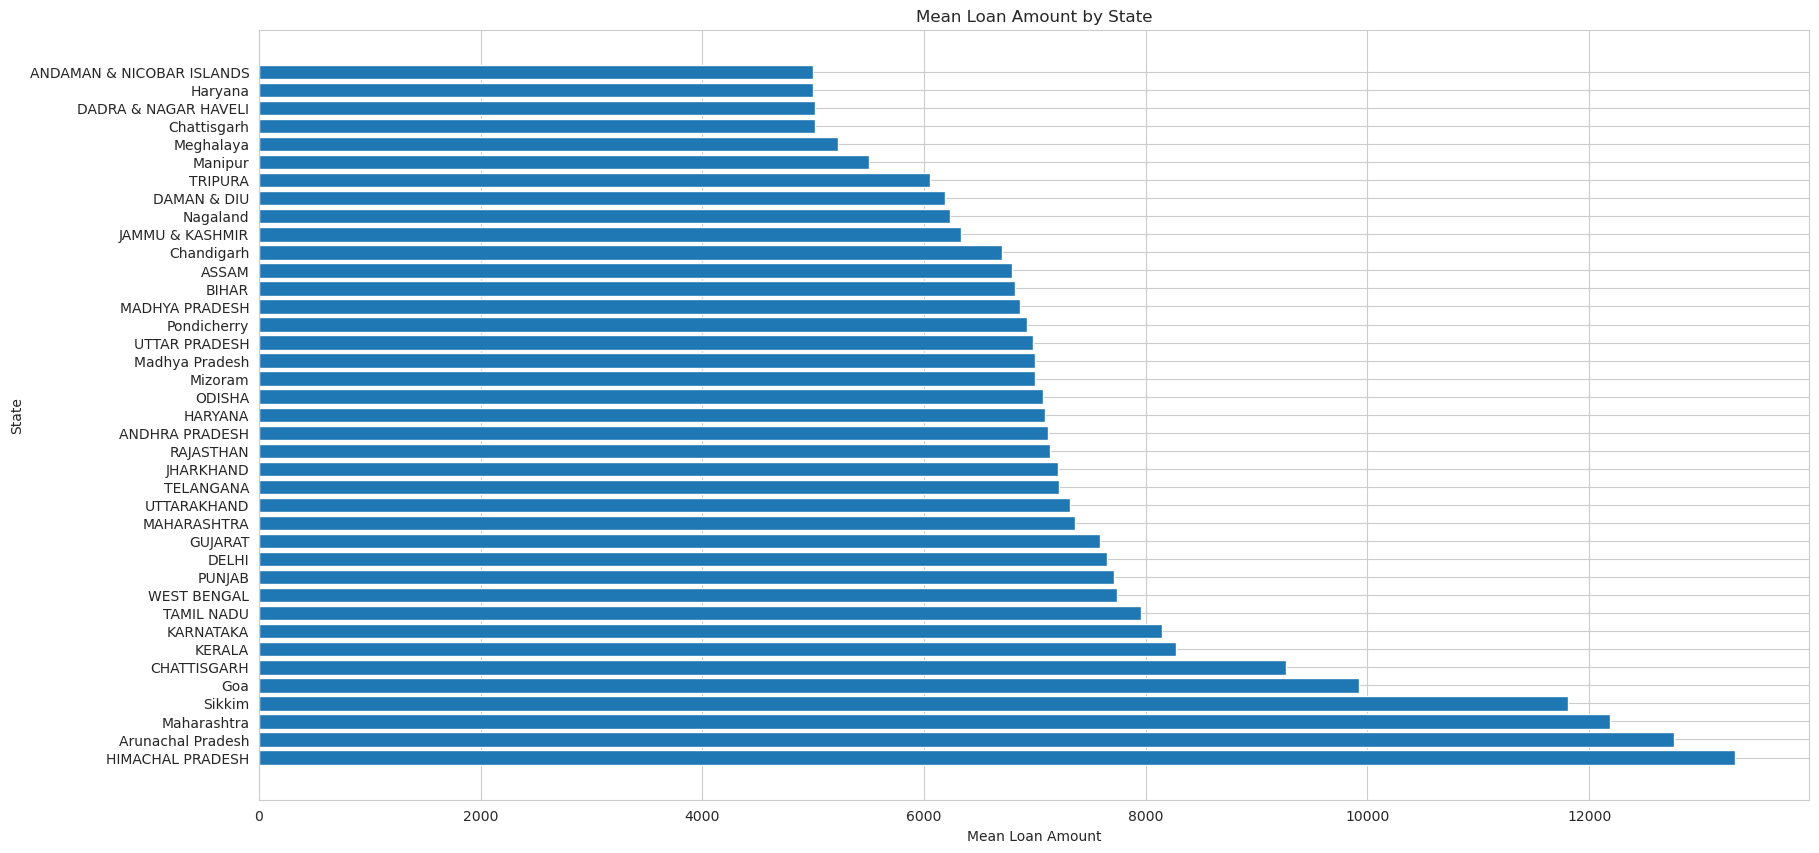

In [72]:
# Group by state and calculate the mean loan amount
state_loan_means = final_dataset.groupby("State")["Loan Amount"].mean().reset_index()

# Set the style to "whitegrid"
sns.set_style("whitegrid")

# Sort by mean loan amount in descending order
state_loan_means = state_loan_means.sort_values("Loan Amount", ascending=False)

# Create the horizontal bar plot with a larger figure size
fig, ax = plt.subplots(figsize=(20, 10))
# Create the horizontal bar plot
ax.barh(state_loan_means["State"], state_loan_means["Loan Amount"])
ax.set_xlabel("Mean Loan Amount")
ax.set_ylabel("State")
ax.set_title("Mean Loan Amount by State")
plt.show()

#### Distribution of loans across different amounts

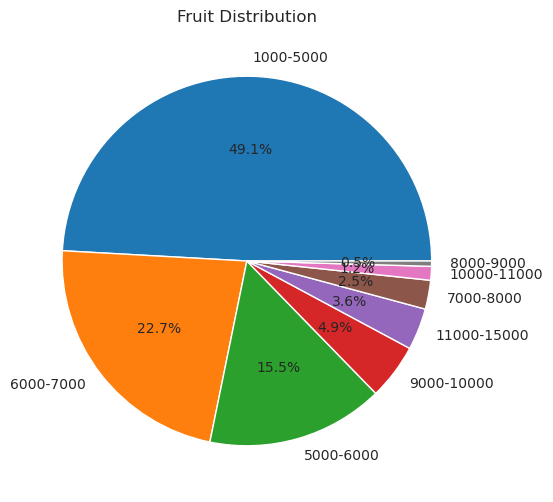

In [76]:
# Create the pie chart
fig, ax = plt.subplots(figsize=(112, 6))
ax.pie(counts["Count"], labels=counts["index"], autopct='%1.1f%%')
ax.set_title('Fruit Distribution')

plt.show()